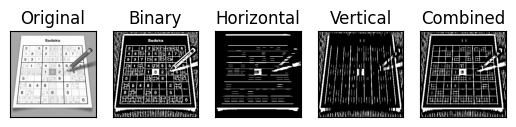

In [10]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# https://docs.opencv.org/4.x/dd/dd7/tutorial_morph_lines_detection.html
# Извлечение горизонтальных и вертикальных линий с помощью морфологических операций

# Загрузка изображения===
src = cv.imread('../lab3/sudoku.jpg', cv.IMREAD_GRAYSCALE)
assert src is not None, "Файл не найден."

# 1. Инвертируем изображение и применяем адаптивный порог
src_bin = cv.adaptiveThreshold(~src, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 15, -2)

# 2. Извлечение горизонтальных и вертикальных линий
horizontal = src_bin.copy()
vertical = src_bin.copy()

# Размер структурирующего элемента
cols = horizontal.shape[1]
horizontal_size = cols // 30

horizontalStructure = cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size, 1))
horizontal = cv.erode(horizontal, horizontalStructure)
horizontal = cv.dilate(horizontal, horizontalStructure)

rows = vertical.shape[0]
verticalsize = rows // 30

verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, verticalsize))
vertical = cv.erode(vertical, verticalStructure)
vertical = cv.dilate(vertical, verticalStructure)

# 3. Комбинируем линии ===
mask = horizontal + vertical

titles = ['Original', 'Binary', 'Horizontal', 'Vertical', 'Combined']
images = [src, src_bin, horizontal, vertical, mask]

for i in range(len(images)):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()
